In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy as sp

In [63]:
from parse import *

## Randomly remove edges

In [64]:
sgraph1 = read_input_file("inputs/small/small-1.in")

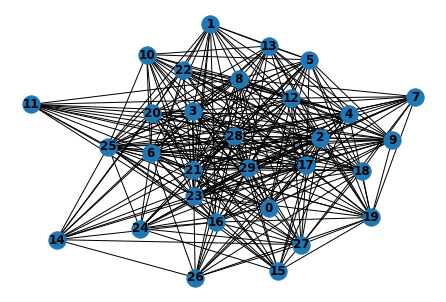

In [65]:
nx.draw(Gg, with_labels=True, font_weight='bold')

In [66]:
l = len(list(Gg.edges))
l

292

In [67]:
sp.special.binom(l, l - 15)

5.074866030134501e+24

In [68]:
nx.dijkstra_path_length(Gg, 0, 29)

25.282

In [114]:
def rem_random(G, cnum, knum, k):
    """
    G: graph input
    k: number of random graphs to consider
    """
    s, t = 0, G.number_of_nodes() - 1
    path = nx.dijkstra_path(G, s, t)
    longest_min_path = nx.dijkstra_path_length(G, s, t)
    rm_edges = 0
    rm_node = 0
    
    nodes = np.sort(list(G.nodes))[1:][:-1]
    
    for n in nodes:
        G_prime = nx.Graph(G)
        G_prime.remove_node(n)
        
        G_prime_edges = list(G_prime.edges.data('weight'))
        
        for _ in range(k):
            to_remove = random.sample(G_prime_edges, 15)
            G_prime.remove_edges_from(to_remove) # take out 15 random edges
            
            if nx.is_connected(G_prime):
                new_min_path = nx.dijkstra_path_length(G_prime, s, t)
        
                if new_min_path > longest_min_path:
                    longest_min_path = new_min_path
                    rm_edges = to_remove
                    path = nx.dijkstra_path(G_prime, s, t)
                    rm_node = n
                    
            G_prime.add_weighted_edges_from(to_remove) # add the edges we took out back
            
    path_diff = longest_min_path - nx.dijkstra_path_length(G, s, t)
            
    return path, path_diff, rm_edges, rm_node

In [115]:
r = rem_random(sgraph1, 15, 1, 10000)
r

([0, 20, 9, 17, 26, 29],
 40.298,
 [(0, 25, 79.238),
  (1, 20, 12.724),
  (15, 21, 34.268),
  (0, 8, 16.838),
  (21, 25, 80.204),
  (0, 5, 10.59),
  (9, 23, 27.4),
  (9, 13, 52.676),
  (5, 9, 5.114),
  (22, 25, 13.281),
  (5, 29, 99.68),
  (11, 18, 15.823),
  (13, 29, 76.799),
  (0, 29, 28.371),
  (2, 4, 18.649)],
 10)

In [93]:
sgraph2 = read_input_file("inputs/small/small-2.in")

In [96]:
r2 = rem_random(sgraph2, 15, 1, 10000)
r2

([0, 28, 1, 10, 29],
 7.0,
 [(26, 4, 96.0),
  (25, 19, 2.0),
  (13, 20, 90.0),
  (7, 18, 48.0),
  (26, 22, 2.0),
  (5, 20, 12.0),
  (29, 16, 12.0),
  (26, 13, 33.0),
  (5, 25, 99.0),
  (4, 12, 47.0),
  (2, 18, 46.0),
  (11, 21, 64.0),
  (0, 29, 24.0),
  (29, 4, 88.0),
  (1, 25, 46.0)],
 14)

This graph has 30 nodes and 111 edges


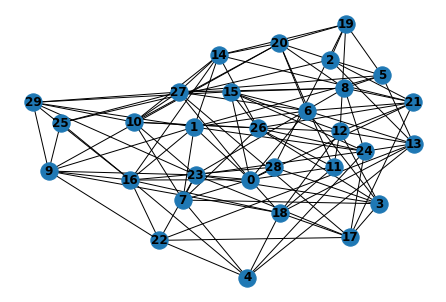

In [57]:
print("This graph has", sgraph2.number_of_nodes(), "nodes and", sgraph2.number_of_edges(), "edges")

nx.draw(sgraph2, with_labels=True, font_weight='bold');

In [84]:
nx.dijkstra_path_length(sgraph2, 0, 29, weight='weight')

34.0

In [99]:
from collections import Counter

In [100]:
def naive(G, cnum, knum):
    """
    repeatedly find k-greedy min path.
    Args:
        G: networkx.Graph
        cnum: number of cities to rm
        knum: number of edges to rm
    returns:
        c: list of cities to remove
        k: list of edges to remove
    """
    c, k = [], []
    G_cut = G.copy()
    
    # start and end
    s, t = 0, G_cut.number_of_nodes() - 1

    nodes = [] # captures freq of nodes in shortest paths
    forbidden_edges = set() # cannot cuts
    stop_cutting = False

    while not stop_cutting and knum > 0: # make knum cuts
        path = nx.dijkstra_path(G_cut, s, t, weight="weight")

        u = 0
        edges = []
        for v in path[1:]:
            edges.append([u,v])
            if v != t:
                nodes.append(v)
            u = v

        # take min edge
        edges.sort(key=lambda e: G_cut[e[0]][e[1]]["weight"])
        # print(f"sorted edges: {edges}")

        for e in edges:
            # if all edges forbidden
            if len(forbidden_edges) == G_cut.number_of_edges():
                stop_cutting = True
                break
            
            # remove edge
            G_cut.remove_edge(e[0], e[1])
            if nx.is_connected(G_cut): 
                k.append(e)
                # print(f"{knum}: cutting edge {e}")
                knum -= 1
                break
            # if disconnects graph, add edge back
            G_cut.add_edge(e[0], e[1])
            forbidden_edges.append(e)

    counts = Counter(nodes)
    top_c = counts.most_common(cnum) # sort
    c = [v[0] for v in top_c]
    # print(f"counts: {counts}")

    G_cut.remove_nodes_from(c)

    # TODO iterate, add count from most common node to knum, rm edges from edges
    # TODO catch case where no more cuts can be made

    print(f"rm nodes: {c}")
    print(f"rm edges: {k}")
    return c, k

In [107]:
def naive_score(G):
    removals = naive(G, 1, 15)
    G_prime = nx.Graph(sgraph2)
    
    G_prime.remove_nodes_from(a[0])
    G_prime.remove_edges_from(a[1])
    
    score = nx.dijkstra_path_length(G_prime, 0, 29, weight="weight")\
        - nx.dijkstra_path_length(G, 0, 29, weight="weight")
    
    return score

In [110]:
naive_score(sgraph2)

rm nodes: [5]
rm edges: [[14, 29], [0, 29], [22, 26], [16, 29], [28, 1], [0, 10], [26, 29], [0, 28], [16, 10], [16, 22], [5, 11], [5, 20], [0, 16], [1, 10], [5, 26]]


28.0

In [ ]:
sgraph3 = 

In [112]:
s = 5
file_num = 'a'

a = f'outputs/{s}-{file_num}.in'
a

'outputs/5-a.in'